![title](img/keras_logo.png)

##### KERAS INTRODUCTION #####

Keras is a high level, deep learning API written in Python. It was developed by Google for implementation of neural networks[1]. Its primary author is François Chollet. Keras is considered slower than other deep learning frameworks but more user friendly.
Frameworks supported by Keras are Tensorflow, Theano, PlaidML, MXNet, CNTK (Microsoft Cognitive Toolkit). [2]


![title](img/BackEnd.png)

TensorFlow has made Keras its official high-level API and Keras and it is embedded in TensorFlow.

#### TensorFlow ####

TensorFlow is an open source, end to end framework for machine learning and use in artificial intelligence. Developed by Google, TensorFlow can be used with multiple programming languages including Python, Java & C ++ leading to its use in many applications.

TensorFlow has many features, among them it's ability to work efficiently with mathematical formulas involving multi-dimensional arrays. It also has strong support for nueral networks and machine learning concepts which I will speak about further below. [4]

#### Neural Network ####

In machine learning, neural networks use computer science and statistics to replicate the human brain and try to solve common problems in the field of artificial intelligence. 

They are a key component of deep learning algorithms. Neural networks consist of Node Layers which in turn are made up of - an input layer, one or multiple hidden layers and an output layer.

Considered vital tools in computer science and artificial intelligence, they rely on training data to improve over time, similar to our own brains.[5] 

![title](img/ANN.png)

##### Anomaly Detection ####

https://keras.io/examples/timeseries/timeseries_anomaly_detection/

In [1]:
# Importing Numpy for numerical arrays

import numpy as np

# Importing Pandas for creating dataframes

import pandas as pd

# Importing Keras from tensorflow library - Neural Networks

from tensorflow import keras

# Importing layers of Neural Networks

from tensorflow.keras import layers

# Importing pyplot for plotting figures

from matplotlib import pyplot as plt


## Loading the Data

https://www.kaggle.com/datasets/boltzmannbrain/nab

The Keras model is using data from the Numenta Anomaly Benchmark (NAB) dataset. The (NAB) is a novel benchmark for evaluating algorithms for anomaly detection in streaming, online applications. It is comprised of over 50 labeled real-world and artificial timeseries data files plus a novel scoring mechanism designed for real-time applications. All of the data and code is fully open-source.

The below model uses two of these datasets - art_daily_small_noise.csv & art_daily_jumpsup.csv.

In [2]:
# Root of URLs.
root_url = 'https://raw.githubusercontent.com/numenta/NAB/master/data/'

# Data file without anomaly.
no_anomaly_url = root_url + 'artificialNoAnomaly/art_daily_small_noise.csv'

# Data file with anomaly.
with_anomaly_url = root_url + 'artificialWithAnomaly/art_daily_jumpsup.csv'



In [3]:
no_anomaly_url



'https://raw.githubusercontent.com/numenta/NAB/master/data/artificialNoAnomaly/art_daily_small_noise.csv'

In [4]:
with_anomaly_url



'https://raw.githubusercontent.com/numenta/NAB/master/data/artificialWithAnomaly/art_daily_jumpsup.csv'

In [5]:
# Reading in both datasets

df_small_noise = pd.read_csv(no_anomaly_url, parse_dates=True, index_col="timestamp")

df_daily_jumpsup = pd.read_csv(with_anomaly_url, parse_dates=True, index_col="timestamp")

#### No Anomaly #### 

In [6]:
# Print data without anomaly. Defaults to first 5 rows but this can be changed by inserting a number.

print(df_small_noise.head()) 


                         value
timestamp                     
2014-04-01 00:00:00  18.324919
2014-04-01 00:05:00  21.970327
2014-04-01 00:10:00  18.624806
2014-04-01 00:15:00  21.953684
2014-04-01 00:20:00  21.909120


In [7]:
# Using Pandas'shape' attribute to get the shape of the data.

df_small_noise.shape

(4032, 1)

4032 rows & 1 column

In [8]:
# Getting descriptive stats - No anomaly

df_small_noise.describe()

value
count  4032.000000
mean     42.438353
std      28.077122
min      18.000964
25%      19.841390
50%      21.608487
75%      75.450282
max      87.976128

The 'describe' function gives a overview of the data in the file.

Count - # of rows of data.

Mean - The average value.

STD - Standard deviation of the values.

Min - Minimum value observed.

Percentiles - 25, 50 & 75. 50 is the same as the median. From the above, we can see that 25% of values are 19.841 or lower. 75 % of values are 75.450 or lower.

Max - The maximum observed value.



In [9]:
# Plotting Data - No anomaly

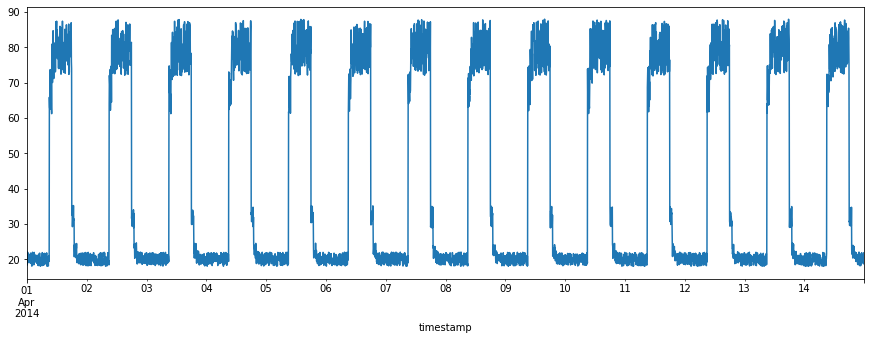

In [10]:
fig, ax = plt.subplots(figsize = (15,5))
df_small_noise.plot(legend=False, ax=ax)
plt.show()


#### With Anomaly ####

In [11]:
print(df_daily_jumpsup.head())

                         value
timestamp                     
2014-04-01 00:00:00  19.761252
2014-04-01 00:05:00  20.500833
2014-04-01 00:10:00  19.961641
2014-04-01 00:15:00  21.490266
2014-04-01 00:20:00  20.187739


In [12]:
df_daily_jumpsup.shape

(4032, 1)

Again, 4032 rows & 1 column


In [13]:
df_daily_jumpsup.describe()

value
count  4032.000000
mean     44.494254
std      32.432473
min      18.001010
25%      19.991382
50%      21.648503
75%      76.435943
max     164.947481

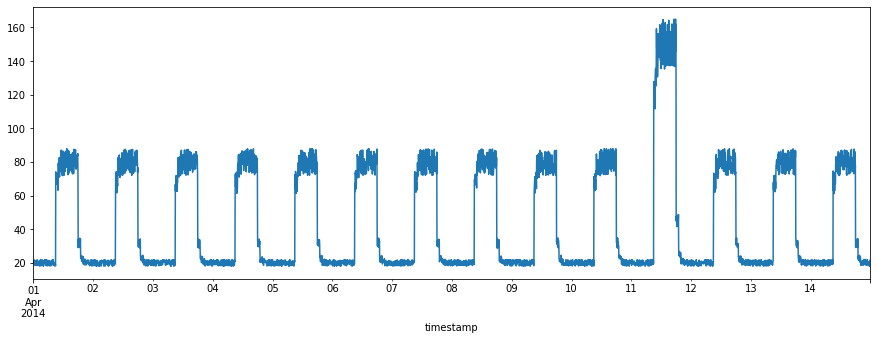

In [14]:
# Plotting the data and adjusting the fig size for easier viewing.

fig, ax = plt.subplots(figsize = (15,5))

#Legend = false as "value" adds little

df_daily_jumpsup.plot(legend=False, ax=ax)
plt.show()


Using the same functions as we did on the dataset without an anomaly, we can see the difference most clearly in the graph above.  The values between the 11th & 12th are clearly out of sync with the other dates.

## Preprocessing

Here we are preparing the model training data by 'Normalizing' it.

In [15]:
# Creating a new variable (train_mean) to store mean without anomaly
train_mean = df_small_noise.mean()

train_mean

value    42.438353
dtype: float64

In [16]:
# Creating a new variable (train_std) to store STD without anomaly
train_std = df_small_noise.std()

train_std

value    28.077122
dtype: float64

In [17]:
# To establish the spread of values centered around 0, the mean is subtracted from the pop. & divided by the STD

df_train_vals = (df_small_noise - train_mean) / train_std



In [18]:
# Prints the first 5 (by default again) rows of the variation spread
df_train_vals.head()



value
timestamp                    
2014-04-01 00:00:00 -0.858829
2014-04-01 00:05:00 -0.728993
2014-04-01 00:10:00 -0.848148
2014-04-01 00:15:00 -0.729586
2014-04-01 00:20:00 -0.731173

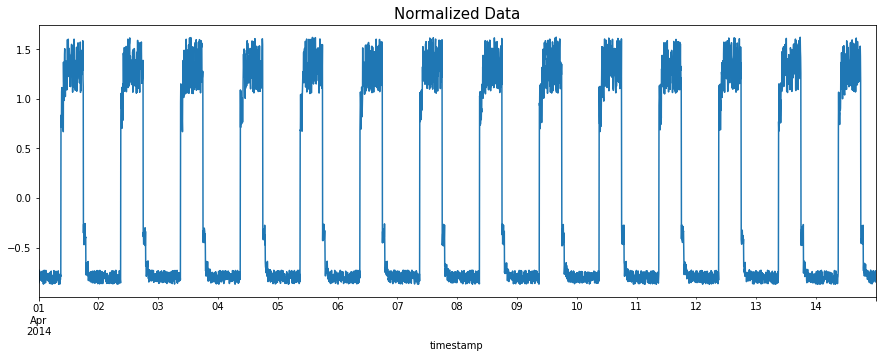

In [19]:
# Plotting these values

fig, ax = plt.subplots(figsize = (15,5))
df_train_vals.plot(legend=False, ax=ax)
plt.title('Normalized Data', fontsize=15)
plt.show()


In [20]:
# 
df_small_noise['less_mean'] = df_small_noise['value'] - df_small_noise['value'].mean()
df_small_noise['div_std'] = df_small_noise['less_mean'] / df_small_noise['value'].std()



In [21]:
df_small_noise



value  less_mean   div_std
timestamp                                          
2014-04-01 00:00:00  18.324919 -24.113435 -0.858829
2014-04-01 00:05:00  21.970327 -20.468026 -0.728993
2014-04-01 00:10:00  18.624806 -23.813547 -0.848148
2014-04-01 00:15:00  21.953684 -20.484669 -0.729586
2014-04-01 00:20:00  21.909120 -20.529234 -0.731173
...                        ...        ...       ...
2014-04-14 23:35:00  20.211195 -22.227159 -0.791647
2014-04-14 23:40:00  20.531041 -21.907313 -0.780255
2014-04-14 23:45:00  19.032127 -23.406226 -0.833640
2014-04-14 23:50:00  21.798801 -20.639552 -0.735102
2014-04-14 23:55:00  18.682620 -23.755733 -0.846089

[4032 rows x 3 columns]

In [22]:


df_small_noise['value'].mean(), df_small_noise['less_mean'].mean(), df_small_noise['div_std'].mean()



(42.438353335806646, -7.342627387941552e-14, -2.616541242931684e-15)

In [23]:


df_small_noise['value'].std(), df_small_noise['less_mean'].std(), df_small_noise['div_std'].std()



(28.077122281262515, 28.077122281262508, 1.0000000000000018)


#### Creating Sequences using Windows

In [24]:
# Getting the shape of the training values dataframe. Once again its 4032
df_train_vals.shape



(4032, 1)

In [25]:
# 288 comes from the # of timesteps per day. Every 5 minutes for 24 hours.

window_size = 288


In [26]:
# Defining Windows/training sequence
def windows(vals, N=window_size):
  # Strating with an empty list
  L = []
  # Loop through all possible Windows
  for i in range(len(vals) - N + 1):
    # Append window to the list
    L.append(vals[i:i+N])
  # Then stack the windows using numpy stack
  return np.stack(L)

In [27]:
# Calling the windows function to create sequences using df_train_vals
x_train = windows(df_train_vals)

In [28]:
# Printing out the first & last value
x_train[0][0], x_train[0][-1]



(array([-0.85882857]), array([-0.79671155]))

In [29]:
# Using pandas iloc to verify that the window 'works'
df_train_vals.iloc[0], df_train_vals.iloc[window_size-1]

(value   -0.858829
 Name: 2014-04-01 00:00:00, dtype: float64,
 value   -0.796712
 Name: 2014-04-01 23:55:00, dtype: float64)

In [30]:
# 288 Windows with 3745 examples
x_train.shape

(3745, 288, 1)

In [31]:
#
df_train_vals['value'].values

array([-0.85882857, -0.72899302, -0.84814772, ..., -0.83364049,
       -0.73510213, -0.8460886 ])

In [32]:
# 
x_train[0].flatten()

array([-0.85882857, -0.72899302, -0.84814772, -0.72958579, -0.731173  ,
       -0.75730984, -0.77645641, -0.7880838 , -0.747012  , -0.829166  ,
       -0.80377285, -0.7821597 , -0.81182078, -0.80949918, -0.82334701,
       -0.79001779, -0.74922405, -0.84169024, -0.73727717, -0.77223023,
       -0.75311352, -0.79116337, -0.75934728, -0.86809294, -0.75381057,
       -0.86468256, -0.74361965, -0.72908121, -0.82850668, -0.84043795,
       -0.76136364, -0.8343536 , -0.74708881, -0.85574949, -0.85245676,
       -0.73090636, -0.77440264, -0.74974936, -0.82419543, -0.77402585,
       -0.78574242, -0.7844733 , -0.77316412, -0.78843253, -0.80927467,
       -0.83109167, -0.76090519, -0.83816509, -0.77176485, -0.83715923,
       -0.78131343, -0.76396862, -0.83924191, -0.86186112, -0.85174179,
       -0.78406773, -0.74938477, -0.86399047, -0.76581026, -0.82177506,
       -0.80222751, -0.73807119, -0.82310669, -0.80410682, -0.86845167,
       -0.85877599, -0.83356075, -0.86643297, -0.78045221, -0.80

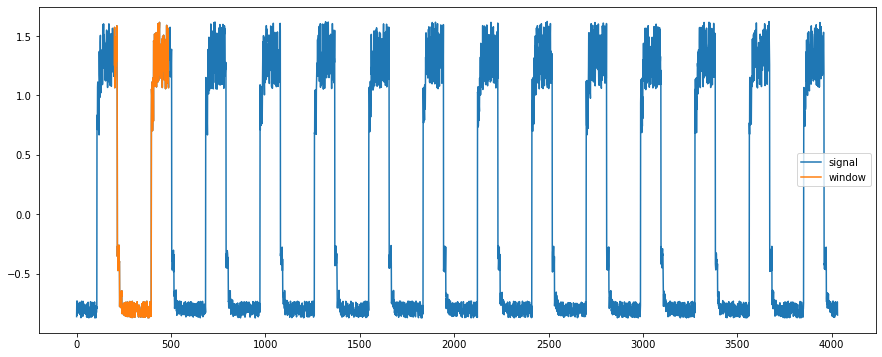

In [33]:
# 
window_no = 200

# 
fig, ax = plt.subplots(figsize=(15, 6))

# 
y = df_train_vals['value'].values

# 
ax.plot(np.arange(y.shape[0]), y, label='signal')

# The first window.
w = x_train[window_no].flatten()

# 
ax.plot(np.arange(w.shape[0]) + window_no, w, label='window')

ax.legend();



#### Neural Network

In [34]:
# x-train shape. 3745 values in 288 windows and one layer
x_train.shape


(3745, 288, 1)

In [35]:
#
layers = [
  #
  keras.layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
  #
  keras.layers.Conv1D(
    filters=32, kernel_size=7, padding="same", strides=2, activation="relu"),
  #
  keras.layers.Dropout(rate=0.2),
  #
  keras.layers.Conv1D(
    filters=16, kernel_size=7, padding="same", strides=2, activation="relu"),
  #
  keras.layers.Conv1DTranspose(
    filters=16, kernel_size=7, padding="same", strides=2, activation="relu"),
  #
  keras.layers.Dropout(rate=0.2),
  #
  keras.layers.Conv1DTranspose(
    filters=32, kernel_size=7, padding="same", strides=2, activation="relu"),
  #
  keras.layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
]



In [36]:
# Creatin model with layer defined above
model = keras.Sequential(layers)



In [37]:
# Using Adam optimizer
optimizer = keras.optimizers.Adam(learning_rate=0.001)



In [38]:
# MSE - Mean Squared Error - Computes the mean squared error between labels and predictions
model.compile(optimizer=optimizer, loss="mse")



In [39]:
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 144, 32)           256       
                                                                 
 dropout (Dropout)           (None, 144, 32)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 72, 16)            3600      
                                                                 
 conv1d_transpose (Conv1DTra  (None, 144, 16)          1808      
 nspose)                                                         
                                                                 
 dropout_1 (Dropout)         (None, 144, 16)           0         
                                                                 
 conv1d_transpose_1 (Conv1DT  (None, 288, 32)          3616      
 ranspose)                                              

In [40]:
# Running the model
history = model.fit(
    # x_train passed as both input & output. Telling the model that it expected to output the same data
    x_train,
    x_train,
    # The number of times the model will work through the datasets
    epochs=50,
    # Batch size is the number of training samples used at a time. ie) runs the first 128 then the next 128 etc
    batch_size=128,
    # Validation split allows a portion of the training data per epoch to be split into a seperate dataset for evaluation. In this case 10%
    validation_split=0.1,
    # Callbacks are used when performance has decreased on a metric
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)



Epoch 1/50
27/27 [==============================] - 5s 93ms/step - loss: 0.5252 - val_loss: 0.0963
Epoch 2/50
27/27 [==============================] - 2s 69ms/step - loss: 0.0803 - val_loss: 0.0406
Epoch 3/50
27/27 [==============================] - 2s 69ms/step - loss: 0.0574 - val_loss: 0.0366
Epoch 4/50
27/27 [==============================] - 2s 70ms/step - loss: 0.0500 - val_loss: 0.0335
Epoch 5/50
27/27 [==============================] - 2s 67ms/step - loss: 0.0446 - val_loss: 0.0323
Epoch 6/50
27/27 [==============================] - 2s 66ms/step - loss: 0.0402 - val_loss: 0.0300
Epoch 7/50
27/27 [==============================] - 2s 67ms/step - loss: 0.0369 - val_loss: 0.0280
Epoch 8/50
27/27 [==============================] - 2s 66ms/step - loss: 0.0339 - val_loss: 0.0276
Epoch 9/50
27/27 [==============================] - 2s 66ms/step - loss: 0.0315 - val_loss: 0.0256
Epoch 10/50
27/27 [==============================] - 2s 68ms/step - loss: 0.0295 - val_loss: 0.0252
Epoch 11/